Pregunta 1)

In [61]:
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rowst = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rowst, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values


#print(df_train_text)   #numero del dato con su respectiva explicacion
#print(df_test_text)

#print len((labels_train))   #vector de 0 y 1 que representa el sentimiento
#print len((labels_test))

Pregunta a)

In [62]:
df_train.Sentiment.shape
df_test.Sentiment.shape

print (len(labels_train))
print (len(labels_test))


3554
3554


**df_train_text:** data que contiene datos representados en 2 columnas, la primera columna con el número del dato, la segunda columna con la opinión sobre la película, esta data es de entrenamiento, con 3554 opiniones.

**df_test_text:** al igual que df_train_text, tiene 2 columnas que representan lo dicho anteriormente, esta data es de prueba, con 3554 opiniones

**labels_train:** vector que representa si la opinión (texto) es negativa o positiva, es decir, 0 o +1 respectivamente. El elemento i-ésimo de este vector, representa a la opinión i-ésima del archivo df_train_text, con 3554 elementos.

**labels_text:** al igual que labels_train, cada i-ésimo elemento representa a la opinión  i-ésima, pero del archivo df_test_text, con 3554 elementos.

Pregunta b)

In [63]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 1000, random_state=0)

In [64]:
print(len(df_train_text))
print(len(df_val_text))
print(len(labels_train))
print(len(labels_val))

2554
1000
2554
1000


Se escogerá un conjunto de 1000 elementos para validación y el resto que son 2554 para entrenamiento, si se desea cambiar los tamaños, es recomendable compilar el primer cuadro antes (pregunta a).

Pregunta c)

In [65]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))
... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

 love eat cake
 love eating cake
 loved eating cake
 love eating cake
 n't love eating cake


Se realiza un pre-procesamiento, eliminando pronombres, artículos y preposiciones, con el fin de que el análisis del texto, en este caso una opinión, sea mucho más facil. Ya que solo se dejan palabras claves, por lo cual es más sencillo analizar si el texto es clasificado como positivo o negativo, además se aliviana la carga para el computador al tener menos texto.


Pregunta d)


In [66]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
print(features_train.shape)


features_val = vectorizer.transform(texts_val)
print(features_val.shape)



features_test = vectorizer.transform(texts_test)
print(features_test.shape)

... #transform val and test
                              #vocabulario en orden
dist_train=list(np.array(features_train.sum(axis=0)).reshape(-1,))  #numero de veces que se repite la palabra en el mismo orden que vocab
dist_val=list(np.array(features_val.sum(axis=0)).reshape(-1,))
dist_test=list(np.array(features_test.sum(axis=0)).reshape(-1,))

(2554, 8086)
(1000, 8086)
(3554, 8086)


In [68]:
npdisttrain = np.array(dist_train)
pos = npdisttrain.argsort()[-10:][::-1] #obtenemos las 10 posiciones de las palabras que mas se repiten
palabras = []
for i in pos:
    palabras.append(vocab[i])
    
print(palabras)  #mayor a menor

npdistval = np.array(dist_val)
pos = npdistval.argsort()[-10:][::-1] #obtenemos las 10 posiciones de las palabras que mas se repiten
palabras = []
for i in pos:
    palabras.append(vocab[i])
    
print(palabras)  #mayor a menor
""" 
npdisttest = np.array(dist_test)
pos = npdisttest.argsort()[-10:][::-1] #obtenemos las 10 posiciones de las palabras que mas se repiten
palabras = []
for i in pos:
    palabras.append(vocab[i])
    
print(palabras)  #mayor a menor""" 


['film', 'movie', 'one', 'ha', 'like', 'make', 'story', 'character', 'good', 'even']
['film', 'movie', 'like', 'one', 'ha', 'time', 'comedy', 'doe', 'good', 'story']


' \nnpdisttest = np.array(dist_test)\npos = npdisttest.argsort()[-10:][::-1] #obtenemos las 10 posiciones de las palabras que mas se repiten\npalabras = []\nfor i in pos:\n    palabras.append(vocab[i])\n    \nprint(palabras)  #mayor a menor'

Las 10 palabras que más se repiten en el conjunto de entrenamiento son:

- Film
- Movie
- One
- Ha
- Like
- Make
- Story
- Character
- Good
- Even

Las 10 palabras que más se repiten en el conjunto de validación son:

- Film
- Movie
- Like
- One
- Ha
- Time
- Comedy
- Doe
- Good
- Story

Pregunta e)

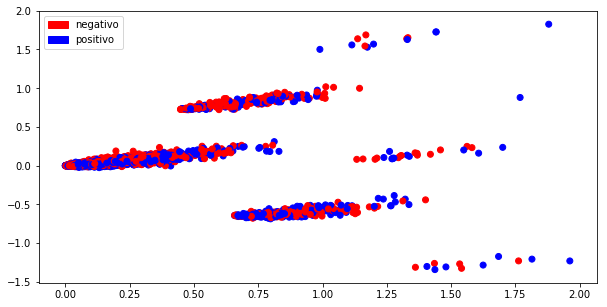

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib as mpl

model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
colors = {0: "red", 1:"blue"}

neg = mpatches.Patch(color='red', label='negativo')
pos = mpatches.Patch(color='blue', label='positivo')
colors =  mpl.colors.ListedColormap(['red','blue'])

plt.scatter(x_plot[:,0], x_plot[:,1], c = labels_train, cmap = colors)
plt.legend(handles=[neg,pos])


plt.show()


En observación a los sectores donde más datos se concentran (3 sectores), es posible afirmar que existe una correlación positiva entre los datos, no es muy alta, pero existe. Además se observan muchos outliers, de ambos datos involucrados (opiniones positivas y negativas) 



Pregunta f)

Param C=  0.0001
Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1
Param C=  10
Param C=  100
Param C=  1000


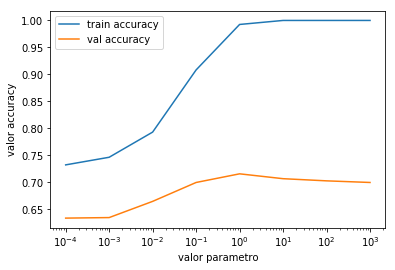

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [9]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    val_acc = model.score(xv,yv)
    return model, train_acc, val_acc
Cs = [10**int(i) for i in np.arange(-4,4)]
#model, train_acc, val_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param=Cs)

def graficar(x,y,xv,yv,Cs):
    
    acc_train = []
    acc_val =  []
    for par in Cs:
        model, train_acc, val_acc = do_LOGIT(features_train,labels_train,features_val,labels_val,par)
        acc_train.append(train_acc)
        acc_val.append(val_acc)
    return model,acc_train,acc_val

model,train_acc, val_acc = graficar(features_train,labels_train,features_val,labels_val,Cs)
plt.plot(Cs,train_acc,label = 'train accuracy')
plt.plot(Cs,val_acc,label = 'val accuracy')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.xscale('log')
plt.legend()
plt.show()
print(model)



En el gráfico se observa que mientras aumente el valor del parámetro, ambos accuracy aumentan, y luego se mantienen casi constante. La línea de train accuracy se mantiene en un aumento mínimo hasta llegar a 10^0 y llegar al mejor valor de accuracy, mientras que la de val accuracy crece hasta un cierto valor de parametro (aproximadamente 10^0) y luego decrece de manera lenta. Además el aumento del parámetro, tiene como consecuencia el ajuste del overfitting, ya que se ajusta a los valores del conjunto de entrenamiento

Pregunta g)

Param C=  0.0001 Kernel=  linear
Param C=  0.001 Kernel=  linear
Param C=  0.01 Kernel=  linear
Param C=  0.1 Kernel=  linear
Param C=  1 Kernel=  linear
Param C=  10 Kernel=  linear
Param C=  100 Kernel=  linear
Param C=  1000 Kernel=  linear


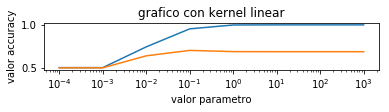

Param C=  0.0001 Kernel=  poly
Param C=  0.001 Kernel=  poly
Param C=  0.01 Kernel=  poly
Param C=  0.1 Kernel=  poly
Param C=  1 Kernel=  poly
Param C=  10 Kernel=  poly
Param C=  100 Kernel=  poly
Param C=  1000 Kernel=  poly


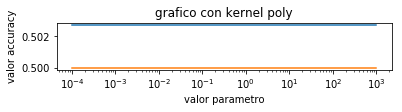

Param C=  0.0001 Kernel=  rbf
Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  rbf
Param C=  1 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  100 Kernel=  rbf
Param C=  1000 Kernel=  rbf


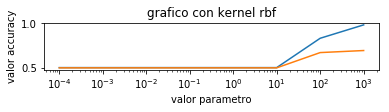

Param C=  0.0001 Kernel=  sigmoid
Param C=  0.001 Kernel=  sigmoid
Param C=  0.01 Kernel=  sigmoid
Param C=  0.1 Kernel=  sigmoid
Param C=  1 Kernel=  sigmoid
Param C=  10 Kernel=  sigmoid
Param C=  100 Kernel=  sigmoid
Param C=  1000 Kernel=  sigmoid


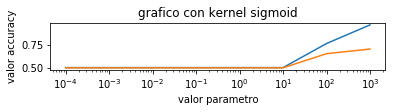

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    val_acc = model.score(xv,yv)
    return model, train_acc, val_acc
Cs = [10**int(i) for i in np.arange(-4,4)]

def graficar(x,y,xv,yv,Cs,kernel):
    
    acc_train = []
    acc_val =  []
    for par in Cs:
        model, train_acc, val_acc = do_SVM(features_train,labels_train,features_val,labels_val,par,kernel)
        acc_train.append(train_acc)
        acc_val.append(val_acc)
    return model,acc_train,acc_val

plt.subplot(4,1,1)
model,train_acc, val_acc = graficar(features_train,labels_train,features_val,labels_val,Cs,'linear')
plt.plot(Cs,train_acc,label = 'train accuracy')
plt.plot(Cs,val_acc,label = 'val accuracy')
plt.title('grafico con kernel linear')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.xscale('log')
plt.show(block=False)

#plt.legend()


plt.subplot(4,1,2)
model,train_acc, val_acc = graficar(features_train,labels_train,features_val,labels_val,Cs,'poly')
plt.plot(Cs,train_acc,label = 'train accuracy')
plt.plot(Cs,val_acc,label = 'val accuracy')
plt.title('grafico con kernel poly')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.xscale('log')
plt.show(block=False)
#plt.legend()


plt.subplot(4,1,3)
model,train_acc, val_acc = graficar(features_train,labels_train,features_val,labels_val,Cs,'rbf')
plt.plot(Cs,train_acc,label = 'train accuracy')
plt.plot(Cs,val_acc,label = 'val accuracy')
plt.title('grafico con kernel rbf')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.xscale('log')
#plt.legend()

plt.show(block=False)

plt.subplot(4,1,4)
model,train_acc, val_acc = graficar(features_train,labels_train,features_val,labels_val,Cs,'sigmoid')
plt.plot(Cs,train_acc,label = 'train accuracy')
plt.plot(Cs,val_acc,label = 'val accuracy')
plt.title('grafico con kernel sigmoid')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.xscale('log')
#plt.legend()


plt.show()

De gráfico linear, se observa que desde el parámetro 10^-3 comienza a aumentar el valor de accuracy, para la línea de train, aproximadamente en 10^0 el valor de accuracy llega a 1.0, la línea de train, luego de 10^1, disminuye muy lentamente, pareciendo ser casi constante.

Del gráfico poly, no hay mucho que concluir, solo que ambas líneas se mantienen constantes en cualquier valor del parámetro.

Del gráfico rbf, a partir del valor 10^1, comienzan a aumentar ambas gráficas, en 10^3, la línea de train llega a 1.0, mientras que el la línea de train, en 10^3 llega hasta 0.75 aproximadamente.

Del último gráfico, sigmoid, la línea de train crece linealmente desde el parámetro 10^1 hasta 10^3, donde alcanza el valor 1.0 mientras que la línea de val, crece desde el parámetro 10^01 hasta 10^3, donde alcanza el valor 0.75 aproximadamente.

Por lo tanto se puede desprender que a mayor valor del parámetro, el valor del accuracy aumenta.

Pregunta h)

Param K=  1
Param K=  501
Param K=  1001
Param K=  1501
Param K=  2001
Param K=  2501


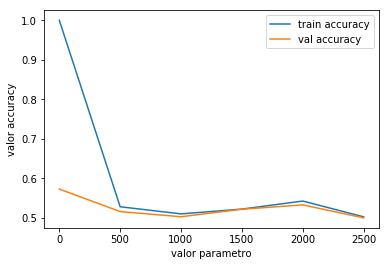

In [11]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    val_acc = model.score(xv,yv)
    return model, train_acc, val_acc

steps = 500
Ks = np.arange(1, features_train.shape[0], steps)

def graficar(x,y,xv,yv,Ks):
    
    acc_train = []
    acc_val =  []
    for par in Ks:
        model, train_acc, val_acc = do_KNN(features_train,labels_train,features_val,labels_val,par)
        acc_train.append(train_acc)
        acc_val.append(val_acc)
    return model,acc_train,acc_val

model,train_acc, val_acc = graficar(features_train,labels_train,features_val,labels_val,Ks)
plt.plot(Ks,train_acc,label = 'train accuracy')
plt.plot(Ks,val_acc,label = 'val accuracy')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.legend()
plt.show()

Para este caso, el valor del parámetro, al aumentarlo, practicamente hace disminuir el valor de accuracy, contrario a la pregunta anterior.
Para este caso un valor de parámetro de 2^0 es un bueno.

Pregunta i)

Param Max-D=  1 Min-samples-S=  2
Param Max-D=  1001 Min-samples-S=  2
Param Max-D=  2001 Min-samples-S=  2
Param Max-D=  3001 Min-samples-S=  2
Param Max-D=  4001 Min-samples-S=  2
Param Max-D=  5001 Min-samples-S=  2
Param Max-D=  6001 Min-samples-S=  2
Param Max-D=  7001 Min-samples-S=  2
Param Max-D=  8001 Min-samples-S=  2
Param Max-D=  None Min-samples-S=  2
Param Max-D=  None Min-samples-S=  1002
Param Max-D=  None Min-samples-S=  2002


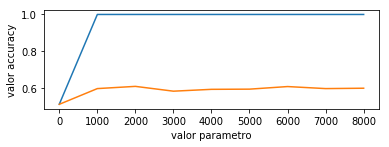

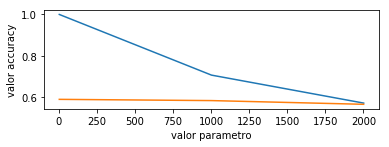

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    val_acc = model.score(xv,yv)
    return model, train_acc, val_acc

steps=1000
Depths = np.arange(1, features_train.shape[1], steps ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , steps ) #choose steps


def graficar(x,y,xv,yv,D,S):
    
    Dacc_train = []
    Dacc_val =  []
    Sacc_train = []
    Sacc_val = []
    for par in D:
        model, train_acc, val_acc = do_Tree(features_train,labels_train,features_val,labels_val,par)

        Dacc_train.append(train_acc)
        Dacc_val.append(val_acc)
        
    

    for par in S:
        model, train_acc, val_acc = do_Tree(features_train,labels_train,features_val,labels_val,None,par)

        Sacc_train.append(train_acc)
        Sacc_val.append(val_acc) 
        
        
    return Dacc_train,Dacc_val,Sacc_train,Sacc_val


Dacc_train,Dacc_val,Sacc_train,Sacc_val = graficar(features_train,labels_train,features_val,labels_val,Depths,SamplesS)

plt.subplot(2,1,1)
plt.plot(Depths,Dacc_train,label = 'train accuracy')
plt.plot(Depths,Dacc_val,label = 'val accuracy')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')

plt.show(block=False)

plt.subplot(2,1,2)
plt.plot(SamplesS,Sacc_train,label = 'train accuracy')
plt.plot(SamplesS,Sacc_val,label = 'val accuracy')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')

plt.show()

El primer gráfico corresponde a solo la variación del parámetro D, mientras que el segundo gráfico corresponde a solo variar el parámetro S.
Al variar el parámetro de Depths, no se observan muchos cambios, de hecho en la segunda gráfica no se utilizó dicha variable y el gráfico se vio mucho más afectado.
El parámetro de Samples más óptimo pareciera ser el 2, ya que en el primer gráfico se llega rapidamente a un valor de accuracy 2, en cambio en el segundo con los otros valores restantes de parámetro, el valor de parámetro disminuye a 0.6.

Pregunta j)

Using TensorFlow backend.


Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512


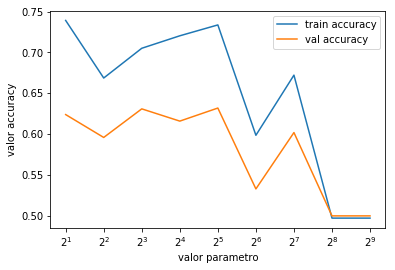

In [13]:
from keras.models import Sequential


from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    val_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, val_acc

N_h = [2**int(i) for i in range(1,10)]


def graficar(x,y,xv,yv,N_h):
    acc_train = []
    acc_val =  []
    for par in N_h:
        model, train_acc, val_acc = do_ANN(features_train,labels_train,features_val,labels_val,par)
        acc_train.append(train_acc)
        acc_val.append(val_acc)
    return model,acc_train,acc_val

model,train_acc, val_acc = graficar(features_train,labels_train,features_val,labels_val,N_h)
plt.plot(N_h,train_acc,label = 'train accuracy')
plt.plot(N_h,val_acc,label = 'val accuracy')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.xscale('log',basex=2)
plt.legend()
plt.show()

Para este caso el mejor valor de parámetro es 2^3, en donde se observas los picks de ambas accuracy de train y val, 0.74 y 0.63 aproximadamente, mientras el valor del parámetro aumenta, no se observa un cambio lineal o cuadrático, pero si este valor aumenta mucho, como se ve en 2^9, el valor decrece hasta 0.5 aproximadamente

Pregunta k)

En observación a los gráficos, particularmente a las líneas que representan el accuracy del conjunto de val (líneas naranjas) se puede afirmar que con DO_LOGIT, se obtiene mejor score, ya que se mantiene en el valor 0.7, el cual es mayor a lo que muestran otros gráficos.

Param C=  0.0001
Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1
Param C=  10
Param C=  100
Param C=  1000


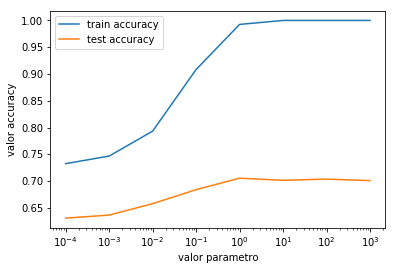

In [72]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**int(i) for i in np.arange(-4,4)]

def graficar(x,y,xv,yv,Cs):
    
    acc_train = []
    acc_test =  []
    for par in Cs:
        model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test,par)
        model.probaility = True
        acc_train.append(train_acc)
        acc_test.append(test_acc)
    return model,acc_train,acc_test

model,train_acc, test_acc = graficar(features_train,labels_train,features_test,labels_test,Cs)
plt.plot(Cs,train_acc,label = 'train accuracy')
plt.plot(Cs,test_acc,label = 'test accuracy')
plt.xlabel('valor parametro')
plt.ylabel('valor accuracy')
plt.xscale('log')
plt.legend()
plt.show()


La línea de test accuracy, resulta ser muy similar a la de val accuracy, ambas resultan ser casi constantes desde el mismo valor de parámetro (10^-0), con un valor de accuracy de 0.7.

Pregunta l)

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)


0.6359032076533483

El score de VADER, da un resultado de 0.63, mientras que utilizando DO_LOGIT (que resultó ser el mejor modelo) con un parámetro igual a 10^-0, alcanza el valor 0.7, por lo que sigue siendo mejor utilizar DO_LOGIT.

Pregunta m)

In [16]:
V = len(vocab)
word_scores = np.zeros((V, 2))

for i in range(V):

    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
    
vocab



['10',
 '100',
 '101',
 '105',
 '10th',
 '11',
 '110',
 '11th',
 '13',
 '13th',
 '14',
 '146',
 '15',
 '16',
 '170',
 '18th',
 '19',
 '1915',
 '1934',
 '1938',
 '1940s',
 '1950',
 '1954',
 '1955',
 '1958',
 '1959',
 '1960s',
 '1972',
 '1975',
 '1978',
 '1979',
 '1980',
 '1992',
 '1995',
 '19th',
 '20',
 '2000',
 '2002',
 '20th',
 '21st',
 '22',
 '25',
 '25s',
 '30',
 '300',
 '3000',
 '30s',
 '37',
 '3d',
 '40',
 '400',
 '401',
 '40s',
 '48',
 '4ever',
 '50',
 '51',
 '53',
 '5ths',
 '60s',
 '65',
 '65th',
 '70s',
 '71',
 '77',
 '78',
 '79',
 '80',
 '800',
 '80s',
 '84',
 '85',
 '88',
 '8th',
 '90',
 '90s',
 '94',
 '95',
 '96',
 '99',
 'aaliyah',
 'abandon',
 'abandono',
 'abbreviated',
 'abel',
 'ability',
 'able',
 'ably',
 'aboul',
 'above',
 'abrahams',
 'abrasive',
 'abroad',
 'abruptly',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstract',
 'absurd',
 'absurdist',
 'absurdity',
 'abuse',
 'acabamos',
 'academic',
 'academy',
 'accent',
 'acc

In [74]:
#print(word_scores)
palabras_positivas = word_scores[word_scores[:,0].argsort()]
palabras_negativas = word_scores[word_scores[:,1].argsort()]

posiciones_negativas = []
posiciones_positivas = []

word_positivas = []
word_negativas = []

for i in range(10):
    index_pos = np.where(word_scores == palabras_positivas[i])
    index_neg = np.where(word_scores == palabras_negativas[i])
    #posiciones_positivas.append(index_pos[0][0])
    #posiciones_negativas.append(index_neg[0][0])
    
    word_positivas.append(vocab[index_pos[0][0]])
    word_negativas.append(vocab[index_neg[0][0]])


#for i in range(10):
 #   word_positivas.append(vocab[posiciones_positivas[i]])
  #  word_negativas.append(vocab[posiciones_negativas[i]])
    
    
print("Lista 10 palabras mas positivas",word_positivas)
print("Lista 10 palabras mas negativas",word_negativas)

Lista 10 palabras mas positivas ['skillful', 'engage', 'dense', 'openness', 'witty', 'still', 'stitch', '19', 'loved', 'touché']
Lista 10 palabras mas negativas ['worst', 'apparent', 'charlie', 'simple', 'comedic', 'naturally', 'dull', 'promotion', 'funnier', 'devoid']


Las traducciones correspondientes a las palabras son:

Palabras positivas: habilidoso, contratar, denso, franqueza, ingenioso, todavía, punto, 19, amado, tocado.
Palabras negativas: peor, evidente, tonto, simple, cómico, naturalmente, aburrido, promoción, gracioso, vacío.

Dentro de la realidad, las palabras positivas que se pueden destacar son ingenioso y habilidoso, que se puede interpretar como una buena opinión a una película, también hay palabras negativas que adquieren sentido como peor, aburrido, vacío, simple, que se interpretan como una mala opinión a una película.

Pregunta n)

In [75]:
#CAMBIANDO LO SOLICITADO
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def base_word(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)
def word_extractor(text):
    
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

Se realiza un pre-procesamiento utilizando la técnica stemming.

Pregunta o)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
features_train = tfidf_model.transform(texts_train)
... #for val and test
features_val = tfidf_model.transform(texts_val)

features_test = tfidf_model.transform(texts_test)

model, train_acc, val_acc = do_LOGIT(features_train,labels_train,features_val,labels_val,1)


Param C=  1


En una matriz, se anota el tipo de opinión (entre 0 y 1) de cada palabra por frase en los 3 conjuntos (test, train, validation)

Pregunta p)

In [78]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          -       0.73      0.74      0.73      1803
          +       0.73      0.72      0.72      1751

avg / total       0.73      0.73      0.73      3554



De este método, se observa un buen método de precision para las etiquetas positivas y las negativas, con una precisión de 0.73 y un recall de 0.72 y 0.74 respectivamente.

Pregunta q)

In [79]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)  

Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          -       0.54      0.99      0.70      1803
          +       0.94      0.14      0.24      1751

avg / total       0.74      0.57      0.48      3554



La precisión para las etiquetas negativas disminuyó a 0.54 mientras que la precisión positiva aumento a 0.94 un valor muy bueno. Mientras que el recall de las etiquetas negativas disminuyò a 0.99 y el de las positivas a 0.14.

Pregunta r)

In [80]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  1.0 -- Pred sent:  [0.87230074 0.12769926]
Raw text:  . . . a weak , manipulative , pencil-thin story that is miraculously able to entertain anyway .

True sent:  0.0 -- Pred sent:  [0.63323633 0.36676367]
Raw text:  for single digits kidlets stuart little 2 is still a no brainer . if you're looking to rekindle the magic of the first film , you'll need a stronger stomach than us .

True sent:  1.0 -- Pred sent:  [0.76123236 0.23876764]
Raw text:  the movie itself is far from disappointing , offering an original take on courtroom movies , a few nifty twists that are so crucial to the genre and another first-rate performance by top-billed star bruce willis .

True sent:  0.0 -- Pred sent:  [0.65400348 0.34599652]
Raw text:  la cinta comienza intentando ser un drama , rápidamente se transforma en una comedia y termina por ser una parodia absolutamente predecible

True sent:  1.0 -- Pred sent:  [0.62023669 0.37976331]
Raw text:  an experience so engrossing it is like being buri

Es interesante darle una predicción que no solo sea 0 o 1, ya que los adjetivos que se puedan utilizar para clasificar la película, no calificarían en un extremo, sino que por ejemplo, pésimo es mucho peor que malo, y no conviene clasificarlos ambos de la misma manera, por lo tanto ampliar el dominio de clasificación no es mala idea.

Pregunta s)

De los modelos vistos, como se mencinó en la pregunta k) el mejor es do_LOGIT, con un accuracy (en validation) cercano o casi igual a 0.7 (70%). Al observar los gráficos, el cambio de parámetros si afectó bastante al valor de accuracy, en el caso de do_Tree, para train accuracy se observa que disminuyó linealmente (pendiente negativa), durante toda la variación del parametro utilizando el Sample S. Para los casos de val accuracy en la mayoría de los casos, se lograba un aumento entre un intervalo de parámetros y luego se mantenía casi constante, por lo que la representación es la que causa la mayor variación.

DO_LOGIT y SVM fueron los mejores modelos, ya que ambos bordeaban el valor 0.7 y no demoraban mucho en ejecutarse.

Pregunta 2)

In [23]:
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv")


In [24]:
df

,WorkerId,Input.id,Input.original_sentence,Input.stemmed_sent,Input.true_sent,Answer.sent
0,A2HD5XMM48KKJW,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
1,A2HD5XMM48KKJW,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
2,A2HD5XMM48KKJW,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,pos
3,A2HD5XMM48KKJW,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,neg
4,A2HD5XMM48KKJW,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,pos
5,A233ONYNWKDIYF,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
6,A233ONYNWKDIYF,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
7,A233ONYNWKDIYF,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,neg
8,A233ONYNWKDIYF,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,pos
9,A233ONYNWKDIYF,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,neg


In [47]:
import pandas as pd
import numpy as np
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv")

In [92]:
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#df_test = pd.read_csv("./sentiment_polarity/mturk_answers.csv",usecols= [2,4])
train, test = np.split(df.sample(frac=1), [int(.6*len(df))])  



df_test = test[["Input.stemmed_sent","Input.true_sent"]]


df_train = train[["Input.stemmed_sent","Answer.sent"]]

labels_test = list(df_test["Input.true_sent"])
labels_train = list(df_train["Answer.sent"])
df_train_text = list(df_train["Input.stemmed_sent"]) 
df_test_text =  list(df_test["Input.stemmed_sent"])

for i in range(len(labels_test)):
    if labels_test[i] == 'pos':
        labels_test[i] = 1
    else:
        labels_test[i] = 0
for i in range(len(labels_train)):
    if labels_train[i] == 'pos':
        labels_train[i] = 1
    else:
        labels_train[i] = 0   


df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 6000, random_state=0)

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(df_train_text)
features_train = vectorizer.transform(df_train_text)
features_val = vectorizer.transform(df_val_text)
features_test = vectorizer.transform(df_test_text)



In [93]:
from sklearn.svm import SVC as SVM #SVC is for classification
model = LogisticRegression()
model.set_params(C=1)
model.fit(features_train,labels_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
y_pred = model.predict(features_test)
y_true = labels_test

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8009730606360933

El resultado del accuracy es de 0.8 aproximadamente (se repitió el proceso al menos 5 veces y da valores cercanos a 0.8), es un resultado bueno ya que en la pregunta 1) el valor de accuracy está en un rango de 0.7 para el caso de do_LOGIT, menor a lo obtenido en esta sección, por lo que el resultado es aceptable.